1. Перенос данных, проверка из целлостности

In [ ]:
!git clone https://github.com/3realm/ML_Start_Project_1.git


Cloning into 'ML_Start_Project_1'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11 (delta 1), reused 11 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), done.
Resolving deltas: 100% (1/1), done.


In [10]:
# Перемещаемя, добавляем в папку data
%cd ML_Start_Project_1
!ls

/content/ML_Start_Project_1
data  logs  models  README.md  src


In [5]:
# Не получилось присоединиться, поэтому запускаем локально (на GIT не рекомендуется все это хранить)
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [7]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [13]:
# Проверяем загруженные файлы, все на месте
!ls
# Перемещаем файлы в нужную папаку
!mv ../train.csv data/
!mv ../test.csv data/
!mv ../submission.csv data/
#
!ls data

data  logs  models  README.md  src
mv: cannot stat '../train.csv': No such file or directory
mv: cannot stat '../test.csv': No such file or directory
mv: cannot stat '../submission.csv': No such file or directory
processed  raw	submission.csv	test.csv  train.csv


In [16]:
%cd data

/content/ML_Start_Project_1/data


In [18]:
# Данные загрузили можем возвращаться
%cd ..


/content/ML_Start_Project_1


EDA + PREPROCESSING

In [17]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [20]:
print("Shape:", train.shape)
print("\nInfo:")
train.info()

print("\nПропуски:")
print(train.isna().sum().sort_values(ascending=False).head(10))


Shape: (5282, 20)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-nul

In [35]:
# Первичный лешкий анализ завершен. Все ясно. Очень похоже на задачу из ЛР по Trees
# Логика такая: делаем разбивку по типу у признаков, потом заполняем NaN.

target = "Churn"

X = train.drop(columns=[target])
y = train[target]

print(f"Shape: X (features): {X.shape}")
print(f"Shape: Y (target): {y.shape}")

# Тут сразу сделаи разбивку на 0 и 1
y.tail()
# Но зато с признаками жуть - Fiber optic или No internet service. В основном бинарные признаки
X.head()

num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

print("Числовые признаки:", num_features.tolist())
print("\nКатегориальные признаки:", cat_features.tolist())


Shape: X (features): (5282, 19)
Shape: Y (target): (5282,)
Числовые признаки: ['ClientPeriod', 'MonthlySpending', 'IsSeniorCitizen']

Категориальные признаки: ['TotalSpent', 'Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']


In [38]:
# Делаем дополнительный просмотр по признакм
for col in cat_features:
    print(f"{col}: {train[col].nunique()} unique values")


TotalSpent: 4978 unique values
Sex: 2 unique values
HasPartner: 2 unique values
HasChild: 2 unique values
HasPhoneService: 2 unique values
HasMultiplePhoneNumbers: 3 unique values
HasInternetService: 3 unique values
HasOnlineSecurityService: 3 unique values
HasOnlineBackup: 3 unique values
HasDeviceProtection: 3 unique values
HasTechSupportAccess: 3 unique values
HasOnlineTV: 3 unique values
HasMovieSubscription: 3 unique values
HasContractPhone: 3 unique values
IsBillingPaperless: 2 unique values
PaymentMethod: 4 unique values


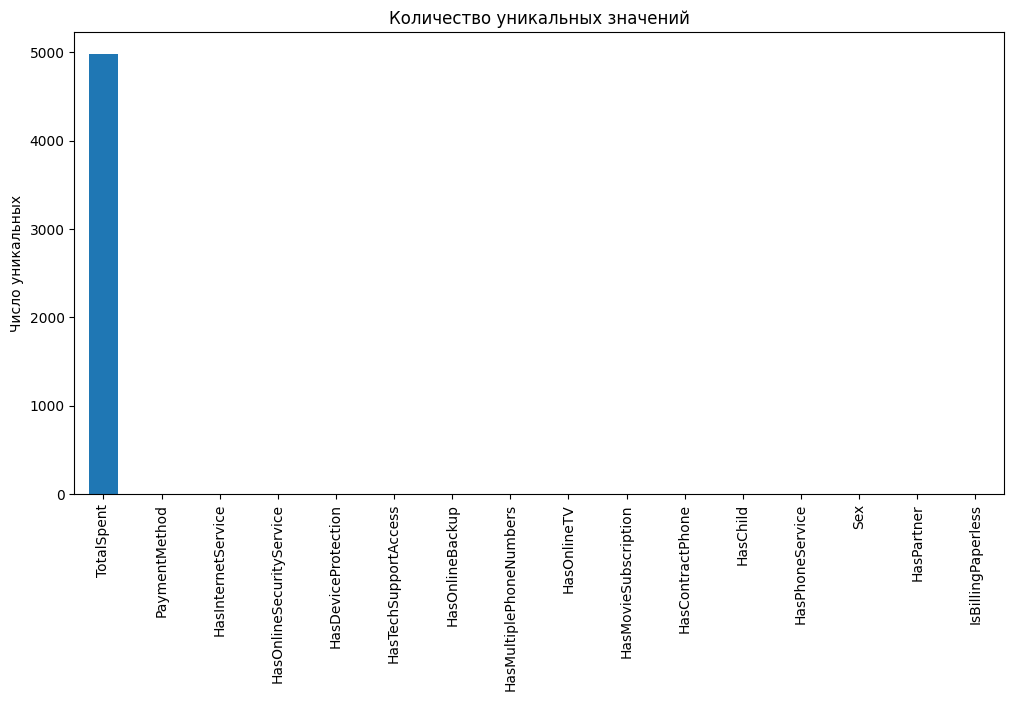

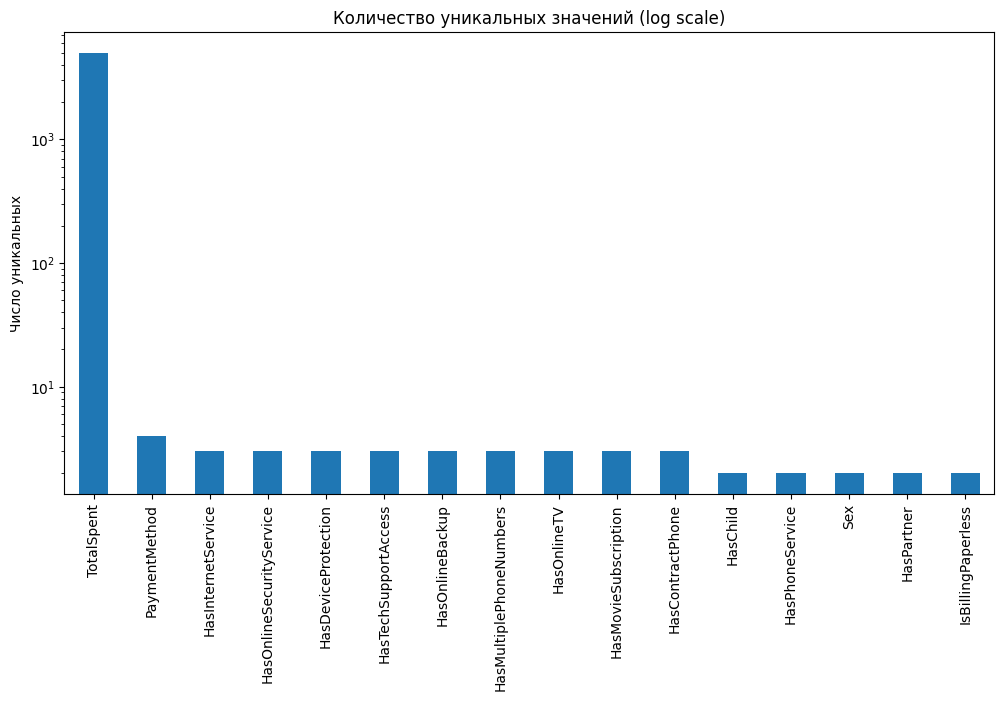

In [41]:
import matplotlib.pyplot as plt

unique_counts = X[cat_features].nunique().sort_values(ascending=False)

# С Total нужно что-то делать... 4978 unique values - тут больше флоат, надо сменить тип видимо
plt.figure(figsize=(12,6))
unique_counts.plot(kind="bar")

plt.yscale("linear")
plt.title("Количество уникальных значений")
plt.ylabel("Число уникальных")

plt.show()

plt.figure(figsize=(12,6))
unique_counts.plot(kind="bar")

plt.yscale("log")
plt.title("Количество уникальных значений (log scale)")
plt.ylabel("Число уникальных")

plt.show()